In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import confusion_matrix,f1_score, accuracy_score as acc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [43]:
new_data = pd.read_csv("leukemia.csv")
print(new_data.shape)

(74, 5148)


## 1. Mutual Info[F1] 
## 2. F Classif[F2] 
## 3.T-Test[F3]

## (c) 2. F2( N features ) → F3( 2N/3 features out of selected features from F2) →    
##           F1(N/3 features out of selected features from F3)

# Preprocessing

In [44]:
df = new_data.iloc[2:,:] # Removes first two tubles
print(df["gene"].unique())
df.gene[df.gene == 'ALL'] = 0
df.gene[df.gene == 'AML'] = 1
print('Updated value of gene : '+str(df["gene"].unique()))


['ALL' 'AML']
Updated value of gene : [0 1]


In [45]:
print('Required data set ')
df.head()

Required data set 


,gene,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,...,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
2,0,88,15091,311,21,-13,215,797,14538,9738,...,384,1582,185,511,389,793,329,36,191,-37
3,0,283,11038,134,-21,-219,116,433,615,115,...,231,624,169,837,442,782,295,11,76,-14
4,0,309,16692,378,67,104,476,1474,5669,3272,...,720,753,315,1199,168,1138,777,41,228,-41
5,0,12,15763,268,43,-148,155,415,4850,2293,...,307,743,240,835,174,627,170,-50,126,-91
6,0,168,18128,118,-8,-55,122,483,1284,2731,...,178,626,156,649,504,250,314,14,56,-25


In [46]:
df.isnull().sum()

gene              0
AFFX-BioC-5_at    0
hum_alu_at        0
AFFX-DapX-M_at    0
AFFX-LysX-5_at    0
                 ..
X83863_at         0
Z17240_at         0
L49218_f_at       0
M71243_f_at       0
Z78285_f_at       0
Length: 5148, dtype: int64

In [47]:
feature_set = df.drop('gene', 1)
feature_name=list(feature_set)
print('Feature names : '+str(feature_name))

Feature names : ['AFFX-BioC-5_at', 'hum_alu_at', 'AFFX-DapX-M_at', 'AFFX-LysX-5_at', 'AFFX-HUMISGF3A/M97935_MA_at', 'AFFX-HUMISGF3A/M97935_MB_at', 'AFFX-HUMISGF3A/M97935_3_at', 'AFFX-HUMRGE/M10098_5_at', 'AFFX-HUMRGE/M10098_M_at', 'AFFX-HUMRGE/M10098_3_at', 'AFFX-HUMGAPDH/M33197_5_at', 'AFFX-HUMGAPDH/M33197_M_at', 'AFFX-HUMGAPDH/M33197_3_at', 'AFFX-HSAC07/X00351_5_at', 'AFFX-HSAC07/X00351_M_at', 'AFFX-HSAC07/X00351_3_at', 'AFFX-HUMTFRR/M11507_5_at', 'AFFX-HUMTFRR/M11507_M_at', 'AFFX-HUMTFRR/M11507_3_at', 'AFFX-M27830_5_at', 'AFFX-M27830_M_at', 'AFFX-HSAC07/X00351_3_st', 'AFFX-HUMGAPDH/M33197_M_st', 'AFFX-HUMGAPDH/M33197_3_st', 'AFFX-HSAC07/X00351_M_st', 'A28102_at', 'AB000114_at', 'AB000115_at', 'AB000220_at', 'AB000409_at', 'AB000449_at', 'AB000450_at', 'AB000460_at', 'AB000462_at', 'AB000464_at', 'AB000467_at', 'AB000468_at', 'AB000584_at', 'AB000905_at', 'AB001106_at', 'AB001325_at', 'AB002314_at', 'AB002315_at', 'AB002365_at', 'AB002380_at', 'AB002559_at', 'AB003102_at', 'AB003103_

In [48]:
feature_set.head()

,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-HUMRGE/M10098_3_at,...,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
2,88,15091,311,21,-13,215,797,14538,9738,8529,...,384,1582,185,511,389,793,329,36,191,-37
3,283,11038,134,-21,-219,116,433,615,115,1518,...,231,624,169,837,442,782,295,11,76,-14
4,309,16692,378,67,104,476,1474,5669,3272,3668,...,720,753,315,1199,168,1138,777,41,228,-41
5,12,15763,268,43,-148,155,415,4850,2293,2569,...,307,743,240,835,174,627,170,-50,126,-91
6,168,18128,118,-8,-55,122,483,1284,2731,316,...,178,626,156,649,504,250,314,14,56,-25


In [49]:
target_feature = df['gene']
target_feature.head()

2    0
3    0
4    0
5    0
6    0
Name: gene, dtype: object

In [50]:
temp_feature_set=StandardScaler().fit_transform(feature_set)
scaled_feature_set = pd.DataFrame(temp_feature_set, columns=feature_name)
scaled_feature_set.head()

,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-HUMRGE/M10098_3_at,...,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,-0.912181,-0.936280,1.330679,0.045416,0.236442,0.196788,0.244435,2.561725,2.489963,1.794520,...,0.428940,1.018678,0.103263,-0.518375,0.019140,0.027771,0.122186,0.593119,-0.391378,-0.161117
1,0.842926,-1.311323,-0.067011,-0.964423,-0.224387,-0.200579,-0.371600,-0.417306,-0.408754,-0.002931,...,-0.425219,-0.474402,-0.067901,0.555431,0.160143,0.003223,-0.043618,0.032103,-0.576990,0.415146
2,1.076941,-0.788133,1.859748,1.151430,0.498175,1.244393,1.390191,0.664072,0.542223,0.548277,...,2.304741,-0.273350,1.493964,1.747818,-0.568816,0.797680,2.306901,0.705322,-0.331659,-0.261337
3,-1.596222,-0.874097,0.991127,0.574379,-0.065558,-0.044040,-0.402063,0.488835,0.247321,0.266520,...,-0.000930,-0.288936,0.691636,0.548844,-0.552853,-0.342677,-0.653193,-1.336776,-0.496289,-1.514082
4,-0.192137,-0.655253,-0.193356,-0.651854,0.142487,-0.176496,-0.286980,-0.274163,0.379259,-0.311094,...,-0.721104,-0.471285,-0.206971,-0.063819,0.325090,-1.183998,0.049037,0.099424,-0.609271,0.139542


# Training and Spilting of Data

In [51]:
X_train, X_test, y_train, y_test = train_test_split(scaled_feature_set, target_feature, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((57, 5147), (15, 5147))

In [52]:
y_train.shape, y_test.shape

((57,), (15,))

In [53]:
columns = feature_set.shape[1]

number_of_features_required_1 = 2*(columns/3)
number_of_features_required_2 = columns/3
number_of_features_required_3 = 0.19*columns

print('number_of_features_required_1 : '+str(number_of_features_required_1))
print('number_of_features_required_2 : '+str(number_of_features_required_2))
print('number_of_features_required_3 : '+str(number_of_features_required_3))

number_of_features_required_1 = int(number_of_features_required_1)
number_of_features_required_2 = int(number_of_features_required_2)
number_of_features_required_3 = int(number_of_features_required_3)

print('number_of_features_required_1 in integers: '+str(number_of_features_required_1))
print('number_of_features_required_2 in integers: '+str(number_of_features_required_2))
print('number_of_features_required_3 in integers: '+str(number_of_features_required_3))

number_of_features_required_1 : 3431.3333333333335
number_of_features_required_2 : 1715.6666666666667
number_of_features_required_3 : 977.9300000000001
number_of_features_required_1 in integers: 3431
number_of_features_required_2 in integers: 1715
number_of_features_required_3 in integers: 977


# Selection of features using F Classification 

In [54]:
f_start_time = time.time()
def correlation(df, threshold):
    correlation_set = set()  # Set of all the names of correlated columns
    correlation_matrix = df.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                column_name = correlation_matrix.columns[i]  # getting the name of column
                correlation_set.add(column_name)
    return correlation_set


selected_features_fc = correlation(X_train, 0.5)
print('Time taken by F-Classification is :'+str(time.time() - f_start_time)+' seconds')

Time taken by F-Classification is :562.8852620124817 seconds


In [55]:
print('Length of selected features : '+str(len(selected_features_fc)))

Length of selected features : 4726


In [56]:
selected_features_fc = list(selected_features_fc)
print('Selected features using F classification')
print(selected_features_fc)

Selected features using F classification
['U36798_at', 'HG1078-HT1078_at', 'X69433_at', 'X67698_at', 'Z24680_at', 'K01160_s_at', 'X04085_rna1_at', 'L13848_at', 'HG1111-HT1111_at', 'U58032_at', 'U20979_at', 'M23613_at', 'M28713_at', 'L13939_s_at', 'HG3942-HT4212_at', 'M29971_at', 'M33764_at', 'M63959_at', 'M13149_at', 'X76104_at', 'D87465_at', 'L40400_at', 'S67798_at', 'U08023_at', 'Z48579_at', 'HG2465-HT4871_at', 'D87127_at', 'U79254_at', 'D00762_at', 'D42041_at', 'X92396_at', 'D88797_at', 'U39573_at', 'X72632_s_at', 'Y13618_at', 'D86550_at', 'L33930_s_at', 'U91932_at', 'X53777_at', 'D49400_at', 'U18671_rna1_at', 'U41745_at', 'L20773_at', 'Z21488_at', 'X52979_rna1_s_at', 'M62994_at', 'X16323_at', 'D38076_at', 'Z49205_at', 'HG3521-HT3715_at', 'M14218_at', 'M97935_s_at', 'U13680_at', 'U37122_at', 'U58048_at', 'U43519_at', 'X95073_at', 'X15573_at', 'U57971_s_at', 'U79259_at', 'D45399_at', 'X60992_at', 'D67029_at', 'X99141_at', 'J04543_at', 'U72882_s_at', 'L09717_at', 'U43083_at', 'Y10659_

In [57]:
required_features_fc = selected_features_fc[:number_of_features_required_1]
print('Length of required features : '+str(len(required_features_fc)))

Length of required features : 3431


In [58]:
X_train1 = X_train[required_features_fc]
X_train1.head()

,U36798_at,HG1078-HT1078_at,X69433_at,X67698_at,Z24680_at,K01160_s_at,X04085_rna1_at,L13848_at,HG1111-HT1111_at,U58032_at,...,M24486_s_at,Y07565_s_at,HG3936-HT4206_at,D31765_at,L13972_at,M97676_at,L33075_at,AFFX-HUMISGF3A/M97935_MB_at,M80647_at,M83667_rna1_s_at
55,-0.420141,-0.961553,-0.035730,-0.686149,-0.105611,-0.302224,-0.790481,-1.127479,0.712908,0.145003,...,-0.280788,-1.197818,-1.349628,0.587257,-0.971542,0.452636,-0.328871,-0.902996,-0.245960,-0.374507
70,-0.820216,4.662859,-0.498220,-0.618774,4.242582,-0.060445,3.251215,-0.741069,1.207430,0.565413,...,-1.332456,0.666398,1.865020,0.662917,0.999557,2.834987,-0.576303,-1.665620,-0.292821,-0.418400
62,-0.864669,-0.699284,0.257143,-0.507648,-0.505261,-0.430224,-0.613149,-0.118684,0.682631,0.245100,...,0.115134,-0.067064,-0.936150,0.587257,-1.137078,-0.862620,0.950167,0.176719,1.246908,0.777132
43,1.928450,3.403609,-0.857809,-0.648524,1.269185,0.021333,-0.853640,0.356216,0.723000,-1.116228,...,-1.623212,-0.204588,1.335069,3.053770,0.585718,1.432875,0.594879,-0.325007,-0.855157,-0.621404
4,-0.946166,-0.950775,-0.348957,-0.184772,-0.372045,-0.330668,-0.135084,0.471254,-1.335826,0.124983,...,0.727575,-0.433795,0.700292,-0.532509,-0.051900,-0.657887,1.367630,-0.176496,0.195875,-0.201130


# Feature Selection Using T-Test

In [59]:
import statistics

In [60]:
temp_index = ['gene'] + required_features_fc
new_df = df[temp_index]
new_df.shape

(72, 3432)

In [61]:
start_time_t = time.time()
x= new_df.values               #converting data-frame into numpy arrray

a,b = x.shape             #size(row,column) of 2-d array stored in two variables

n1 =0;
n2 = 0;

for i in range(a):        #calculating size of each class lable
    if x[i][0] == 1:
        n1=n1 + 1;
    else:
        n2=n2 + 1;


sample1 = []
sample2= []
tval=[]

#below is main loop for calculating t-value of each column

for j in range(1,b):      #for each column(feature)
    for i in range(a):

        if x[i][0]== 1:           #dividing feature values into two samples corresponding to class levels  1 and 2.
            sample1.append(x[i][j])
        else:
            sample2.append(x[i][j])



    sample1 = list(map(int,sample1))       #converting sample values from string to integar
    sample2 = list(map(int,sample2))


    s1bar = statistics.mean(sample1)          #calculating mean of each sample
    s2bar = statistics.mean(sample2)

    s1var = statistics.variance(sample1)      #calculating variance of each sample
    s2var = statistics.variance(sample2)



    t = abs(s1bar - s2bar)/np.sqrt(s1var/n1+s2var/n2)        #calculating t value by comparing mean and variance using given formula

    tval.append(t)       #appending t-value of each sample to a list

    sample1.clear()      #clearing sample list  as it will be reused for each column(feature)
    sample2.clear()



sort_index=[]

sort_index = sorted(range(len(tval)), key=lambda k: tval[k])   #sorting t-value in ascending order and storing corresponding index


new_index = [p+1 for p in sort_index]    #increasing sorted index by 1 since  we have to fetch it from dataframe for corresponding columns

new_index.reverse()     # it will sort the index in descending order

# Note: columns having more t- values are more important hence we will select less than 20% of features from starting of the calculated new_index list

required_features_t = new_index[:number_of_features_required_2]   #selecting important features
print('Time taken by T Test is :'+str(time.time() - start_time_t)+' seconds')

Time taken by T Test is :2.281262159347534 seconds


In [62]:
print(required_features_t)

[3141, 595, 742, 1047, 2362, 3130, 2962, 1897, 1527, 3135, 3158, 1364, 1324, 2144, 990, 2505, 726, 2935, 1103, 3264, 401, 1870, 2142, 2351, 2044, 2191, 274, 2070, 2127, 2038, 1661, 3421, 1588, 1718, 978, 912, 3331, 555, 2830, 2502, 2245, 3377, 2491, 2333, 1649, 1085, 909, 3201, 572, 67, 286, 519, 983, 3296, 1274, 3063, 1306, 448, 3355, 2755, 846, 2365, 484, 2400, 2263, 1022, 337, 2163, 3359, 3285, 374, 3044, 37, 1906, 2020, 1423, 1456, 2683, 2982, 2793, 918, 2168, 837, 105, 2557, 2792, 2806, 3295, 2291, 1746, 1764, 1717, 3032, 2453, 937, 1016, 2042, 1769, 1393, 989, 2430, 1987, 544, 3263, 2223, 2487, 2310, 1595, 2708, 502, 1246, 1422, 2475, 404, 1497, 3268, 3169, 2886, 1012, 2282, 2654, 1916, 3361, 99, 3172, 1682, 1573, 1840, 57, 1707, 16, 2420, 214, 1385, 3072, 1589, 1179, 2394, 1821, 1298, 2053, 1123, 3137, 411, 2841, 1406, 294, 320, 1498, 2313, 2343, 932, 1856, 1010, 869, 2412, 3121, 305, 184, 1517, 199, 3406, 3091, 1495, 527, 642, 3166, 2433, 774, 2167, 456, 927, 1376, 1572, 2074, 

In [63]:
df1 = df.iloc[:,required_features_t]
selected_features_tt=list(df1)
print('Length of selected_features_tt : ',len(selected_features_tt))

Length of selected_features_tt :  1715


In [64]:
print('selected_features_tt :',selected_features_tt)

selected_features_tt : ['X58288_at', 'D87845_at', 'HG429-HT429_at', 'L25851_at', 'U44755_at', 'X56997_rna1_at', 'X05232_at', 'U02310_at', 'M60315_at', 'X57346_at', 'X59834_at', 'M26576_cds2_at', 'M22538_at', 'U23752_at', 'L18983_at', 'U57721_at', 'HG4058-HT4328_at', 'X02750_at', 'L36463_at', 'X68994_at', 'D63486_at', 'S87759_at', 'U23028_at', 'U43527_at', 'U14969_at', 'U28831_at', 'D31884_at', 'U16660_at', 'U21090_at', 'U14528_at', 'M82882_at', 'X81882_at', 'M64934_at', 'M91036_rna1_at', 'L15409_at', 'L07949_at', 'X75342_at', 'D87292_at', 'U86529_at', 'U57592_at', 'U33429_at', 'X78926_at', 'U56637_at', 'U41813_at', 'M80783_at', 'L34060_at', 'L07633_at', 'X63657_at', 'D87449_at', 'AF000177_at', 'D38048_at', 'D86962_at', 'L16895_at', 'X72177_rna1_at', 'M16424_at', 'X51408_at', 'M21121_at', 'D79995_at', 'X77166_at', 'U79263_at', 'J05032_at', 'U44848_at', 'D83779_at', 'U48807_at', 'U35113_at', 'L20971_at', 'D49396_at', 'U25750_at', 'X77548_at', 'X70649_at', 'D50922_at', 'X16416_at', 'AB000

In [65]:
X_train2 = X_train.iloc[:,required_features_t]
X_train2.head()

,X58377_at,D87937_at,HG4297-HT4567_at,L25876_at,U44772_at,X57025_at,X05246_at,U02493_at,M60331_at,X57398_at,...,M33987_at,U00943_at,HG4747-HT5195_at,U70671_at,M18737_rna1_at,L40411_at,X80692_at,J02963_at,J04111_at,S57887_at
55,-0.209145,-0.660812,-1.081902,0.571371,-0.614015,1.578980,0.343718,-0.927655,-0.819694,-0.310829,...,1.440420,-1.396696,0.424331,0.095755,0.333191,-0.691912,-1.027419,1.377385,-1.071058,-0.192311
70,-0.365461,-0.824623,-1.246249,0.133883,-0.399650,0.174036,0.283553,-0.895459,-0.134205,0.851414,...,2.182455,1.237334,-1.994651,1.988516,0.069166,1.817633,-0.320152,1.441100,-0.480256,-1.384822
62,0.155592,0.018831,1.194368,0.664059,1.755492,-0.965108,2.108545,0.192385,-0.134205,1.044253,...,0.800233,-1.248190,0.430816,-0.438842,0.036670,-1.692553,-0.565806,0.920764,-0.323047,-1.362739
43,1.458226,-0.402896,-0.908341,-0.440783,-0.223564,-0.585393,1.085748,-0.597399,-1.439270,-0.308223,...,-0.320093,1.581243,-0.678154,-0.130606,0.483483,-1.303414,-0.725076,-0.173003,0.688671,1.927710
4,1.423489,-0.179834,1.033094,0.734502,-0.143176,-0.129736,0.524212,0.444101,0.327182,1.833849,...,-1.105777,-0.474395,1.747313,-0.544798,0.670332,0.697868,-0.158183,-0.842006,-0.181051,-0.280645


# Selection of features using Mutual Information 

In [66]:

from scipy.special import digamma
def mutual_info(data,x_index,target):
  x=data[x_index]
  y=target
  #Combining the data values
  combo_d= np.vstack((x,y)).T
  #Number of data points
  n=len(x)
  n_x=[]
  unique_y=len(set(y))
  #Defining Empty list for every class
  for i in range(unique_y):
    n_x.append([]) 
  for item in combo_d:
    index=item[1]
    n_x[index].append(item)
  I_i=np.zeros(len(x))
  indx=0
  for pt in combo_d:
    distx=[]
    #Calculating distance of a point with all other points in the same class
    for pt_c in n_x[pt[1]]:
      if pt_c[0]==pt[0]:
        continue
      distx.append(abs(pt_c[0]-pt[0]))
    distx.sort()
    #Considering k=3 for the kth nearest neighbour of point in the class the point belongs to
    k=3
    kth_dist_c=distx[k-1]
    dist=[]
    #Calculating distance of a point with all other points in the data set
    for pt_all in combo_d:
      if pt_all[0]==pt[0] and pt_all[1]==pt[1]:
        continue
      dist.append(abs(pt_all[0]-pt[0]))
    #Calculating the number of points in the dataset at distance = kth distance_class from the point
    m_i=0
    for i in range(len(dist)):
      if dist[i]<=kth_dist_c:
        m_i+=1
    #Total points in class the point belongs to
    n_x_i=len(n_x[pt[1]])
    #Calculating I_i for every point
    I_i[indx]=digamma(n)-digamma(n_x_i)+digamma(k)-digamma(m_i)
    indx=indx + 1
  mutual_info_xy=np.sum(I_i)/n
  return abs(mutual_info_xy)

In [67]:
X_train_tp=X_train2.values.transpose()
mi_start_time = time.time()
#Total feature in training set 
total_features=len(required_features_t)
#Defining array to list of mutual information of every pair of feature and target feature
mutual_information= np.zeros(total_features)
for i in range(total_features):
  mutual_information[i]=mutual_info(X_train_tp,i,y_train)
  print('Mutual Information between Gene and Feature_'+feature_name[i]+' : ',mutual_information[i])
    
print('Time taken by Mutual Information is :'+str(time.time() - mi_start_time)+' seconds')

Mutual Information between Gene and Feature_AFFX-BioC-5_at :  0.08325980886230915
Mutual Information between Gene and Feature_hum_alu_at :  0.06274698834948864
Mutual Information between Gene and Feature_AFFX-DapX-M_at :  0.029119186411422936
Mutual Information between Gene and Feature_AFFX-LysX-5_at :  0.029303579906080218
Mutual Information between Gene and Feature_AFFX-HUMISGF3A/M97935_MA_at :  0.1294337354101825
Mutual Information between Gene and Feature_AFFX-HUMISGF3A/M97935_MB_at :  0.16528806325898465
Mutual Information between Gene and Feature_AFFX-HUMISGF3A/M97935_3_at :  0.09308987387813267
Mutual Information between Gene and Feature_AFFX-HUMRGE/M10098_5_at :  0.13303890217324396
Mutual Information between Gene and Feature_AFFX-HUMRGE/M10098_M_at :  0.15092163763094912
Mutual Information between Gene and Feature_AFFX-HUMRGE/M10098_3_at :  0.038294465323543955
Mutual Information between Gene and Feature_AFFX-HUMGAPDH/M33197_5_at :  0.018851897085976316
Mutual Information betw

Mutual Information between Gene and Feature_D13168_at :  0.10648034764012351
Mutual Information between Gene and Feature_D13264_at :  0.08254046479713331
Mutual Information between Gene and Feature_D13315_at :  0.004148299598430867
Mutual Information between Gene and Feature_D13370_at :  0.14114828977710583
Mutual Information between Gene and Feature_D13435_at :  0.2643463374280476
Mutual Information between Gene and Feature_D13540_at :  0.03054363920585922
Mutual Information between Gene and Feature_D13626_at :  0.09030223037841488
Mutual Information between Gene and Feature_D13627_at :  0.04235268245207231
Mutual Information between Gene and Feature_D13628_at :  0.06911743173720435
Mutual Information between Gene and Feature_D13630_at :  0.1493104707334045
Mutual Information between Gene and Feature_D13633_at :  0.1288424092315892
Mutual Information between Gene and Feature_D13634_at :  0.10575946368638965
Mutual Information between Gene and Feature_D13635_at :  0.10505006997145573
M

Mutual Information between Gene and Feature_D28915_at :  0.06788487162204686
Mutual Information between Gene and Feature_D29012_at :  0.1573195905100672
Mutual Information between Gene and Feature_D29013_at :  0.1820098143020508
Mutual Information between Gene and Feature_D29641_at :  0.1798202172648228
Mutual Information between Gene and Feature_D29642_at :  0.02139177742241851
Mutual Information between Gene and Feature_D29643_at :  0.1189114379349909
Mutual Information between Gene and Feature_D29677_at :  0.10165337636578378
Mutual Information between Gene and Feature_D29954_at :  0.005299820221205997
Mutual Information between Gene and Feature_D29956_at :  0.03196757897384517
Mutual Information between Gene and Feature_D29958_at :  0.07295740039357851
Mutual Information between Gene and Feature_D29963_at :  0.14000000203927923
Mutual Information between Gene and Feature_D30036_at :  0.0673184553791243
Mutual Information between Gene and Feature_D30037_at :  0.001121381987040172
Mu

Mutual Information between Gene and Feature_D50532_at :  0.2245642159019958
Mutual Information between Gene and Feature_D50640_at :  0.10601507503862799
Mutual Information between Gene and Feature_D50645_at :  0.004497114155342049
Mutual Information between Gene and Feature_D50663_at :  0.040655312968339595
Mutual Information between Gene and Feature_D50678_at :  0.03457265107541391
Mutual Information between Gene and Feature_D50683_at :  0.16218513147427202
Mutual Information between Gene and Feature_D50692_at :  0.08284136963675913
Mutual Information between Gene and Feature_D50840_at :  0.2456759240207921
Mutual Information between Gene and Feature_D50857_at :  0.05463294323853947
Mutual Information between Gene and Feature_D50863_at :  0.11640974073211789
Mutual Information between Gene and Feature_D50911_at :  0.07896145770147
Mutual Information between Gene and Feature_D50912_at :  0.03157207164825613
Mutual Information between Gene and Feature_D50913_at :  0.06868145344028603
Mu

Mutual Information between Gene and Feature_D86960_at :  0.05909062827916413
Mutual Information between Gene and Feature_D86961_at :  0.07606882552051926
Mutual Information between Gene and Feature_D86962_at :  0.009363533266084259
Mutual Information between Gene and Feature_D86963_at :  0.16700207260660116
Mutual Information between Gene and Feature_D86964_at :  0.10060454983706663
Mutual Information between Gene and Feature_D86965_at :  0.07865258115136624
Mutual Information between Gene and Feature_D86966_at :  0.05531387565321809
Mutual Information between Gene and Feature_D86967_at :  0.09038516215108289
Mutual Information between Gene and Feature_D86968_at :  0.04064707530530314
Mutual Information between Gene and Feature_D86969_at :  0.0378928012690365
Mutual Information between Gene and Feature_D86970_at :  0.13874192234994837
Mutual Information between Gene and Feature_D86971_at :  0.2793946834748456
Mutual Information between Gene and Feature_D86972_at :  0.01762929465633649


Mutual Information between Gene and Feature_HG2415-HT2511_at :  0.000644144260597695
Mutual Information between Gene and Feature_HG2417-HT2513_at :  0.06162529299404715
Mutual Information between Gene and Feature_HG2442-HT2538_at :  0.033717148793333304
Mutual Information between Gene and Feature_HG2460-HT2556_at :  0.10882338301394706
Mutual Information between Gene and Feature_HG2463-HT2559_at :  0.10996245877946309
Mutual Information between Gene and Feature_HG2480-HT2576_at :  0.06879611208437093
Mutual Information between Gene and Feature_HG2525-HT2621_at :  0.08253682140800528
Mutual Information between Gene and Feature_HG2538-HT2634_at :  0.05341672844891754
Mutual Information between Gene and Feature_HG2566-HT4867_at :  0.030748899202140904
Mutual Information between Gene and Feature_HG2573-HT2669_at :  0.0366542966179614
Mutual Information between Gene and Feature_HG2614-HT2710_at :  0.16029456747601512
Mutual Information between Gene and Feature_HG2663-HT2759_at :  0.06086419

Mutual Information between Gene and Feature_J03069_rna1_at :  0.09370740220463937
Mutual Information between Gene and Feature_J03133_at :  0.09231587534340603
Mutual Information between Gene and Feature_J03161_at :  0.009239287419172636
Mutual Information between Gene and Feature_J03171_at :  0.04477942778375311
Mutual Information between Gene and Feature_J03191_at :  0.04850952191916111
Mutual Information between Gene and Feature_J03258_at :  0.01397242182044288
Mutual Information between Gene and Feature_J03278_at :  0.04551329606160231
Mutual Information between Gene and Feature_J03459_at :  0.038311413834336235
Mutual Information between Gene and Feature_J03473_at :  0.19149669862395227
Mutual Information between Gene and Feature_J03507_at :  0.018870120318703578
Mutual Information between Gene and Feature_J03589_at :  0.007435606833106551
Mutual Information between Gene and Feature_J03592_at :  0.06535467402707817
Mutual Information between Gene and Feature_J03600_at :  0.01380127

Mutual Information between Gene and Feature_L07541_at :  0.02150967532424991
Mutual Information between Gene and Feature_L07548_at :  0.07668941653189741
Mutual Information between Gene and Feature_L07590_at :  0.015268170814313057
Mutual Information between Gene and Feature_L07594_at :  0.09987657230038775
Mutual Information between Gene and Feature_L07597_at :  0.11248421487666911
Mutual Information between Gene and Feature_L07633_at :  0.08505204683875768
Mutual Information between Gene and Feature_L07758_at :  0.05030199254004952
Mutual Information between Gene and Feature_L07765_at :  0.028872821580585052
Mutual Information between Gene and Feature_L07949_at :  0.1324654620086803
Mutual Information between Gene and Feature_L07956_at :  0.0700877731026754
Mutual Information between Gene and Feature_L08069_at :  0.061562084697988954
Mutual Information between Gene and Feature_L08177_at :  0.002125357673271035
Mutual Information between Gene and Feature_L08187_at :  0.111419394697454

Mutual Information between Gene and Feature_L24564_at :  0.14330460198134862
Mutual Information between Gene and Feature_L24783_at :  0.16628989708683456
Mutual Information between Gene and Feature_L24804_at :  0.04358356476899015
Mutual Information between Gene and Feature_L25080_at :  0.020392103811941547
Mutual Information between Gene and Feature_L25081_at :  0.1521265071794719
Mutual Information between Gene and Feature_L25085_at :  0.1033077920681871
Mutual Information between Gene and Feature_L25119_at :  0.07532002724850115
Mutual Information between Gene and Feature_L25270_at :  0.004489680837659369
Mutual Information between Gene and Feature_L25441_at :  0.07211466559111267
Mutual Information between Gene and Feature_L25798_at :  0.017061681993251872
Mutual Information between Gene and Feature_L25851_at :  0.0061893646866018216
Mutual Information between Gene and Feature_L25876_at :  0.03594497553843232
Mutual Information between Gene and Feature_L26247_at :  0.05969351155760

Mutual Information between Gene and Feature_L40393_at :  0.042046123076764134
Mutual Information between Gene and Feature_L40394_at :  0.08197965621217304
Mutual Information between Gene and Feature_L40395_at :  0.12354588730628233
Mutual Information between Gene and Feature_L40396_at :  0.04728839537010557
Mutual Information between Gene and Feature_L40400_at :  0.018769517684431337
Mutual Information between Gene and Feature_L40401_at :  0.01433513288897936
Mutual Information between Gene and Feature_L40410_at :  0.08078634455692374
Mutual Information between Gene and Feature_L40411_at :  0.024736580767221863
Mutual Information between Gene and Feature_L40586_at :  0.11119988259388483
Mutual Information between Gene and Feature_L40636_at :  0.10255914987217653
Mutual Information between Gene and Feature_L40904_at :  0.030066020472170742
Mutual Information between Gene and Feature_L40933_at :  0.03166239855773423
Mutual Information between Gene and Feature_L40992_at :  0.0713070524382

Mutual Information between Gene and Feature_M20902_at :  0.034711255161386415
Mutual Information between Gene and Feature_M21005_at :  0.03280154206746281
Mutual Information between Gene and Feature_M21121_at :  0.03832030134540233
Mutual Information between Gene and Feature_M21154_at :  0.024153466807036242
Mutual Information between Gene and Feature_M21186_at :  0.08643241417358159
Mutual Information between Gene and Feature_M21188_at :  0.17522369293145643
Mutual Information between Gene and Feature_M21259_at :  0.07588002796330062
Mutual Information between Gene and Feature_M21389_at :  0.0850557485969667
Mutual Information between Gene and Feature_M21494_at :  0.004054413867440469
Mutual Information between Gene and Feature_M21551_rna1_at :  0.02039192931947129
Mutual Information between Gene and Feature_M21574_at :  0.00221887840187404
Mutual Information between Gene and Feature_M21624_at :  0.08978352393865582
Mutual Information between Gene and Feature_M21812_at :  0.0039442034

Mutual Information between Gene and Feature_M34677_at :  0.04471718850039597
Mutual Information between Gene and Feature_M35128_at :  0.09503541142738542
Mutual Information between Gene and Feature_M35252_at :  0.12954181121324096
Mutual Information between Gene and Feature_M35296_at :  0.14255754812288532
Mutual Information between Gene and Feature_M35416_at :  0.10570919183800792
Mutual Information between Gene and Feature_M35878_at :  0.12466295479331888
Mutual Information between Gene and Feature_M36067_at :  0.0453108326006394
Mutual Information between Gene and Feature_M36089_at :  0.06538874230703207
Mutual Information between Gene and Feature_M36200_at :  0.06895513642689703
Mutual Information between Gene and Feature_M36205_at :  0.037260819352504984
Mutual Information between Gene and Feature_M36341_at :  0.1341077038897563
Mutual Information between Gene and Feature_M37033_at :  0.0375729213227249
Mutual Information between Gene and Feature_M37104_at :  0.012705774260286984


Mutual Information between Gene and Feature_M73720_at :  0.08954254778707682
Mutual Information between Gene and Feature_M74002_at :  0.17355860105738616
Mutual Information between Gene and Feature_M74089_at :  0.01907569681686424
Mutual Information between Gene and Feature_M74091_at :  0.03818865549109063
Mutual Information between Gene and Feature_M74093_at :  0.07754917389470826
Mutual Information between Gene and Feature_M74096_at :  0.024727963599147508
Mutual Information between Gene and Feature_M74099_at :  0.10903133801089548
Mutual Information between Gene and Feature_M74491_at :  0.012737154129128136
Mutual Information between Gene and Feature_M74524_at :  0.03284637185756214
Mutual Information between Gene and Feature_M74525_at :  0.07313494347428588
Mutual Information between Gene and Feature_M74558_at :  0.052460805859868
Mutual Information between Gene and Feature_M74719_at :  0.08974506854089578
Mutual Information between Gene and Feature_M74826_at :  0.01802976132820426

<AxesSubplot:>

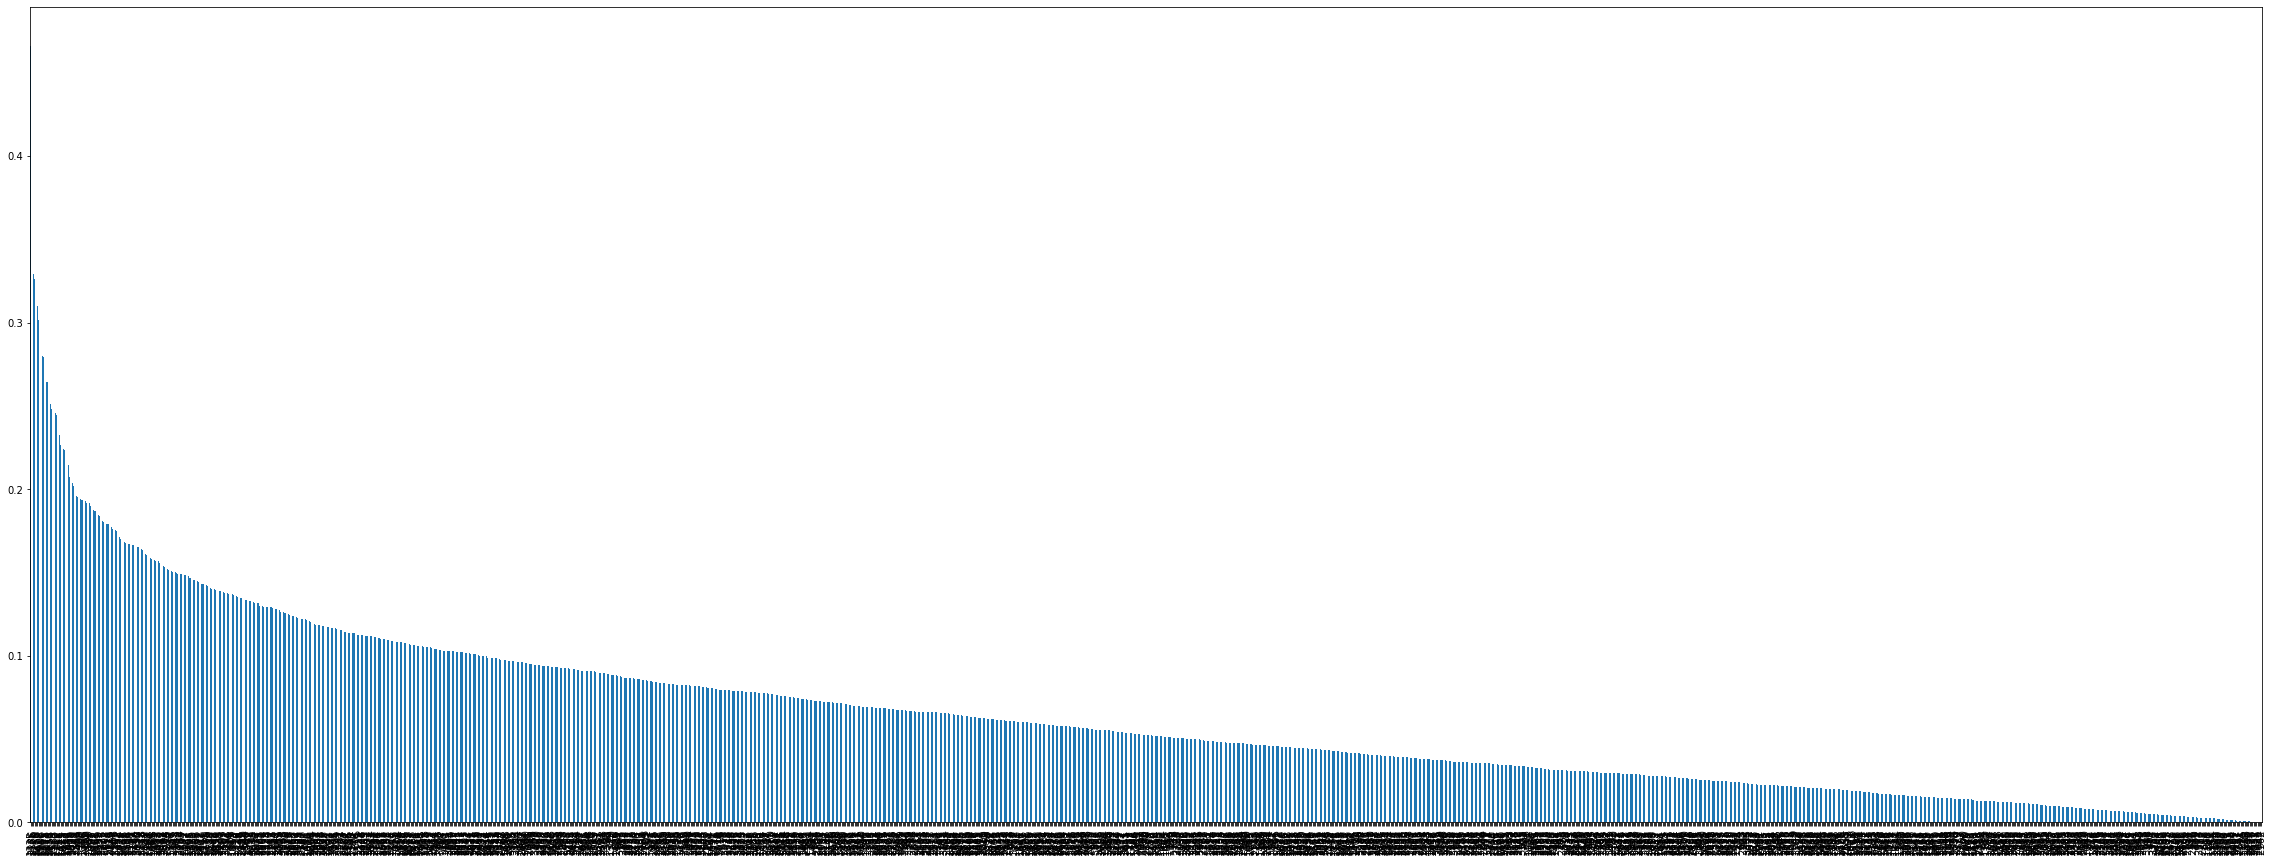

In [68]:
mutual_info=pd.Series(mutual_information)
mutual_info.index=required_features_t
mutual_info.sort_values(ascending=False,inplace=True)
mutual_info.plot.bar(figsize=(40,15))

In [69]:
required_indices = (-mutual_information).argsort()[:number_of_features_required_3]
selected_features_mi=[]
selected_indices=[]
for i in range(number_of_features_required_3):
    selected_indices.append(required_indices[i])
    selected_features_mi.append(feature_name[required_indices[i]])
    print('Selected Feature '+str(i+1)+ ' is : ', feature_name[required_indices[i]])

Selected Feature 1 is :  L11005_at
Selected Feature 2 is :  K03008_cds2_at
Selected Feature 3 is :  L19711_at
Selected Feature 4 is :  D23673_at
Selected Feature 5 is :  L02547_at
Selected Feature 6 is :  L42243_cds1_at
Selected Feature 7 is :  M19301_at
Selected Feature 8 is :  D63391_at
Selected Feature 9 is :  L05512_at
Selected Feature 10 is :  L11285_at
Selected Feature 11 is :  D86971_at
Selected Feature 12 is :  J04988_at
Selected Feature 13 is :  M13666_at
Selected Feature 14 is :  D13435_at
Selected Feature 15 is :  HG1071-HT1071_at
Selected Feature 16 is :  HG3748-HT4018_at
Selected Feature 17 is :  M54968_at
Selected Feature 18 is :  M37825_at
Selected Feature 19 is :  D88532_at
Selected Feature 20 is :  D50840_at
Selected Feature 21 is :  L28957_at
Selected Feature 22 is :  D13748_at
Selected Feature 23 is :  M20543_at
Selected Feature 24 is :  HG4321-HT4591_at
Selected Feature 25 is :  D50532_at
Selected Feature 26 is :  M33882_at
Selected Feature 27 is :  M25393_at
Select

Selected Feature 704 is :  M36089_at
Selected Feature 705 is :  J03592_at
Selected Feature 706 is :  M69043_at
Selected Feature 707 is :  M34455_at
Selected Feature 708 is :  D16583_at
Selected Feature 709 is :  M63573_at
Selected Feature 710 is :  M26880_at
Selected Feature 711 is :  L35251_rna1_at
Selected Feature 712 is :  HG2167-HT2237_at
Selected Feature 713 is :  D26600_at
Selected Feature 714 is :  L07033_at
Selected Feature 715 is :  D42087_at
Selected Feature 716 is :  HG3432-HT3618_at
Selected Feature 717 is :  AFFX-HSAC07/X00351_3_st
Selected Feature 718 is :  L11669_at
Selected Feature 719 is :  M77698_at
Selected Feature 720 is :  M30938_at
Selected Feature 721 is :  HG415-HT415_at
Selected Feature 722 is :  D31765_at
Selected Feature 723 is :  D80001_at
Selected Feature 724 is :  L28997_at
Selected Feature 725 is :  L14922_at
Selected Feature 726 is :  D90084_at
Selected Feature 727 is :  M86667_at
Selected Feature 728 is :  D83702_at
Selected Feature 729 is :  hum_alu_at

In [70]:
required_features_mi = selected_features_mi
print('Length of required features : '+str(len(required_features_mi)))
print(required_features_mi)

Length of required features : 977
['L11005_at', 'K03008_cds2_at', 'L19711_at', 'D23673_at', 'L02547_at', 'L42243_cds1_at', 'M19301_at', 'D63391_at', 'L05512_at', 'L11285_at', 'D86971_at', 'J04988_at', 'M13666_at', 'D13435_at', 'HG1071-HT1071_at', 'HG3748-HT4018_at', 'M54968_at', 'M37825_at', 'D88532_at', 'D50840_at', 'L28957_at', 'D13748_at', 'M20543_at', 'HG4321-HT4591_at', 'D50532_at', 'M33882_at', 'M25393_at', 'D87127_at', 'D83785_at', 'M23668_at', 'D14878_at', 'HG2320-HT2416_at', 'J02963_at', 'L34059_at', 'D42044_at', 'L35545_at', 'M37721_at', 'D38047_at', 'D31883_at', 'L41559_at', 'M33764_at', 'D42055_at', 'L19067_at', 'M17754_at', 'L21934_at', 'J03473_at', 'M63488_at', 'D83657_at', 'L76703_at', 'D13640_at', 'M13792_at', 'D00632_at', 'D10495_at', 'AF000430_at', 'D29013_at', 'M15661_at', 'M14218_at', 'D29641_at', 'L34657_at', 'M22919_rna2_at', 'J04101_at', 'M29536_at', 'L14837_at', 'L41919_rna1_at', 'M11353_at', 'M21188_at', 'M81637_at', 'M74002_at', 'L37882_at', 'HG987-HT987_at', 

In [71]:
X_train3 = X_train[required_features_mi]
X_train3.head()

,L11005_at,K03008_cds2_at,L19711_at,D23673_at,L02547_at,L42243_cds1_at,M19301_at,D63391_at,L05512_at,L11285_at,...,M60854_at,M23197_at,D63880_at,AF005775_at,M34182_at,D90209_at,J03171_at,M34677_at,D00763_at,D28483_at
55,0.923372,-1.349025,0.320696,-0.537215,1.106953,-0.388735,-1.450608,0.247263,-0.125189,0.808568,...,1.117673,-0.568187,0.110903,-0.518444,-0.160203,-0.504642,-1.031786,-0.625095,-0.397950,-0.619377
70,0.348848,2.808041,-1.043992,0.820879,-1.198740,-0.599893,0.924573,-0.621489,-0.011093,1.828448,...,-1.525462,3.933768,-0.334105,1.287959,4.982213,0.447327,-0.582671,-2.372215,-0.188215,1.062526
62,2.646946,0.160524,3.614581,-0.452904,2.179026,0.814863,-0.551891,0.406102,-0.561439,-0.095528,...,-0.601403,0.466492,-0.298217,0.429016,0.400966,-0.713549,1.438345,-0.565009,0.199894,1.647894
43,2.514363,3.435085,-1.296104,1.466885,0.255168,0.825421,2.080067,0.279679,-0.816478,-0.171896,...,0.655644,-0.059653,-0.097246,0.442130,2.253559,-0.848534,-1.480900,-1.683535,0.969251,2.876342
4,0.893909,0.942393,-0.161604,-0.137306,1.224440,1.057694,0.881777,0.535766,-0.937286,-0.149725,...,0.524006,-0.048646,1.442338,-0.321739,-0.770382,0.181213,0.679840,-0.470258,0.558600,-0.396772


In [72]:
X_test3 = X_test[required_features_mi]
X_test3.head()

,L11005_at,K03008_cds2_at,L19711_at,D23673_at,L02547_at,L42243_cds1_at,M19301_at,D63391_at,L05512_at,L11285_at,...,M60854_at,M23197_at,D63880_at,AF005775_at,M34182_at,D90209_at,J03171_at,M34677_at,D00763_at,D28483_at
26,0.672938,-1.279354,2.217009,0.411856,0.813234,0.804305,-1.365016,-0.767361,-0.769497,-1.916039,...,1.099504,-0.733295,0.053483,0.586380,0.815104,-0.911527,0.769663,-1.219023,0.342004,2.373420
27,-2.494312,-0.118162,-0.726113,0.165758,-0.728790,-1.370618,-0.573289,-0.916475,-0.413785,-0.198994,...,-0.243942,2.273878,-0.689394,0.455243,1.159402,0.469182,2.396457,-1.373861,-0.677271,0.798698
48,-0.166751,-1.232906,-0.479483,1.576262,-0.596616,-1.117229,-1.514802,-0.495066,0.022465,-0.410853,...,0.030458,-0.836763,-0.179788,-1.075773,-1.488384,-0.887101,-0.388055,0.708355,-0.589064,-0.479219
22,-0.888590,0.841756,-0.227372,-0.565699,0.167053,-0.209251,-0.723075,1.164639,1.150004,0.091696,...,2.612780,-0.680460,0.699462,-0.469268,0.719534,-0.290594,-0.637563,0.156025,-0.523400,-0.619377
30,0.584550,-0.226540,0.682420,-0.811796,-1.022508,-0.230367,-1.193832,-1.545348,-0.158747,1.715128,...,-0.038884,-0.020027,-0.836533,1.786277,-1.501862,1.246956,-2.603687,-0.516478,-0.816441,1.483001


In [73]:
X_test3.shape

(15, 977)

In [74]:
y_train3 = np.array([a+1 for a in y_train]) 
print(y_train3)

y_test3 = np.array([a+1 for a in y_test])

print(y_test3)

[1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 2 1
 2 1 2 1 1 1 2 1 2 1 1 1 2 1 1 2 2 2 1 1]
[1 2 1 1 2 1 1 2 2 2 1 2 2 1 2]


# KNN Classifier

In [75]:
temp_fscore=0
temp_cm = np.zeros([2,2])

sum =0
for i in range(1,20):
    classfier = KNeighborsClassifier(n_neighbors=i)
    classfier.fit(X_train3, y_train3) 
    print('KNN Classfier for '+str(i)+ ' neighbors:')
    y_train_prediction = classfier.predict(X_train3)
    print('Training accuracy on selected features for '+str(i)+ ' neighbors: %.4f' % (100*acc(y_train3, y_train_prediction)))

    y_test_prediction = classfier.predict(X_test3)
    print('Testing accuracy on selected features for '+str(i)+ ' neighbors: %.4f' %(100*acc(y_test3, y_test_prediction)))
    
     
    f_score_knn = f1_score(y_test3, y_test_prediction)
    temp_fscore= temp_fscore + f_score_knn
    
    cm = confusion_matrix(y_test3, y_test_prediction)
    cm= np.array(cm)
    temp_cm = temp_cm + cm
    
    sum = sum + 100*acc(y_test3, y_test_prediction)
    if i !=1:
        if max_test_accuracy < (100*acc(y_test3, y_test_prediction)):
            max_test_accuracy = (100*acc(y_test3, y_test_prediction))
            max_y_test_prediction = y_test_prediction
            index = i
    else:
        max_test_accuracy = (100*acc(y_test3, y_test_prediction))
        max_y_test_prediction = y_test_prediction
        index = i

print('Average Testing accuracy obtained on selected features by KNN Classifier: %.4f' % (sum/19))                        
print('Maximum Testing accuracy obtained on selected features for '+str(index)+ ' neighbors: %.4f' % max_test_accuracy)                   

KNN Classfier for 1 neighbors:
Training accuracy on selected features for 1 neighbors: 100.0000
Testing accuracy on selected features for 1 neighbors: 86.6667
KNN Classfier for 2 neighbors:
Training accuracy on selected features for 2 neighbors: 84.2105
Testing accuracy on selected features for 2 neighbors: 80.0000
KNN Classfier for 3 neighbors:
Training accuracy on selected features for 3 neighbors: 89.4737
Testing accuracy on selected features for 3 neighbors: 86.6667
KNN Classfier for 4 neighbors:
Training accuracy on selected features for 4 neighbors: 84.2105
Testing accuracy on selected features for 4 neighbors: 80.0000
KNN Classfier for 5 neighbors:
Training accuracy on selected features for 5 neighbors: 87.7193
Testing accuracy on selected features for 5 neighbors: 86.6667
KNN Classfier for 6 neighbors:
Training accuracy on selected features for 6 neighbors: 84.2105
Testing accuracy on selected features for 6 neighbors: 80.0000
KNN Classfier for 7 neighbors:
Training accuracy on

In [76]:
cm = confusion_matrix(y_test3, max_y_test_prediction)
print('Maximum Confusion matrix :',cm)
print('Average Confusion matrix is :',(temp_cm/19))

Maximum Confusion matrix : [[7 0]
 [2 6]]
Average Confusion matrix is : [[7.         0.        ]
 [4.42105263 3.57894737]]


Confusion Matrix of KNN Classifier:


<AxesSubplot:>

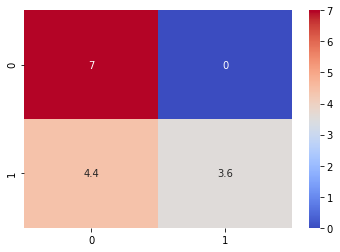

In [77]:
print('Confusion Matrix of KNN Classifier:')
sns.heatmap((temp_cm/19),annot = True,cmap='coolwarm')

In [78]:
f_score_knn = f1_score(y_test3, max_y_test_prediction)

print('Maximum F-Score is : '+str(f_score_knn))
print('Average F-Score is : '+str(temp_fscore/19))

Maximum F-Score is : 0.8750000000000001
Average F-Score is : 0.7672727355023263


# SVM(Support Vector Machine)

In [79]:
from sklearn.svm import SVC
classfier_svc = SVC()
classfier_svc.fit(X_train3,y_train3)
print('SVM Classfier')
y_train_prediction_svc = classfier_svc.predict(X_train3)
print('Training accuracy on selected features: %.4f' % (100*acc(y_train3, y_train_prediction_svc)))

y_test_prediction_svc = classfier_svc.predict(X_test3)
print('Testing accuracy on selected features: %.4f' % (100*acc(y_test3, y_test_prediction_svc)))

SVM Classfier
Training accuracy on selected features: 100.0000
Testing accuracy on selected features: 80.0000


In [80]:
cm_svc = confusion_matrix(y_test3, y_test_prediction_svc)
print('Confusion Matrix of SVM Classifier:')
print(cm_svc)

Confusion Matrix of SVM Classifier:
[[7 0]
 [3 5]]


Confusion Matrix of SVM Classifier:


<AxesSubplot:>

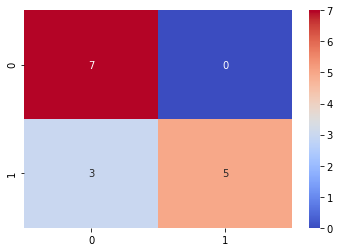

In [81]:
print('Confusion Matrix of SVM Classifier:')
sns.heatmap(cm_svc,annot = True,cmap='coolwarm', fmt = "d")

In [82]:
f_score_svc = f1_score(y_test3, y_test_prediction_svc)

print(' F-Score of SVM Classifier is : '+str(f_score_svc))

 F-Score of SVM Classifier is : 0.8235294117647058
